In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamz_16chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamz_16chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamz_16chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamz_16chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -818.237191631  post:  -1100.71660284
prior:  -282.479411206  like:  -810.99637186  post:  -1093.47578307
prior:  -282.479411206  like:  -818.066737791  post:  -1100.546149
prior:  -282.479411206  like:  -822.684386614  post:  -1105.16379782
prior:  -282.479411206  like:  -809.922394456  post:  -1092.40180566
prior:  -282.479411206  like:  -817.101037216  post:  -1099.58044842
prior:  -282.479411206  like:  -806.970675922  post:  -1089.45008713
prior:  -282.479411206  like:  -814.257451818  post:  -1096.73686302
prior:  -282.479411206  like:  -826.555342847  post:  -1109.03475405
prior:  -282.479411206  like:  -816.900959009  post:  -1099.38037022
prior:  -282.479411206  like:  -810.339269944  post:  -1092.81868115
prior:  -282.479411206  like:  -812.770531677  post:  -1095.24994288
prior:  -282.479411206  like:  -814.714519302  post:  -1097.19393051
prior:  -282.479411206  like:  -816.338958267  post:  -1098.81836947
prior:  -282.479411206  like:  -821.3

In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  94  of  105  parameters.
Percent of parameters with GR below 1.2:  89.5238095238
Number of parameters with GR below 1.1:  78  of  105  parameters.
Percent of parameters with GR below 1.1:  74.2857142857


[94, 89.52380952380953, 78, 74.28571428571429]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  96  of  105  parameters.
Percent of parameters with GR below 1.1:  91.4285714286


[105, 100.0, 96, 91.42857142857143]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  94  of  105  parameters.
Percent of parameters with GR below 1.2:  89.5238095238
Number of parameters with GR below 1.1:  73  of  105  parameters.
Percent of parameters with GR below 1.1:  69.5238095238


[94, 89.52380952380953, 73, 69.52380952380952]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  84  of  105  parameters.
Percent of parameters with GR below 1.2:  80.0
Number of parameters with GR below 1.1:  65  of  105  parameters.
Percent of parameters with GR below 1.1:  61.9047619048


[84, 80.0, 65, 61.904761904761905]

60000
16
60000


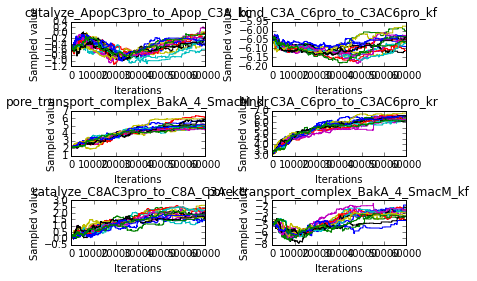

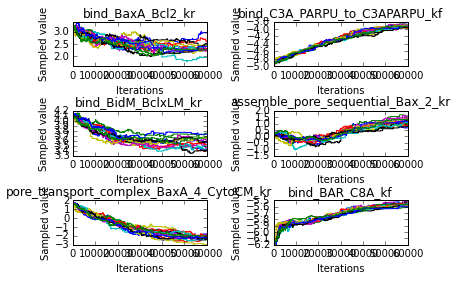

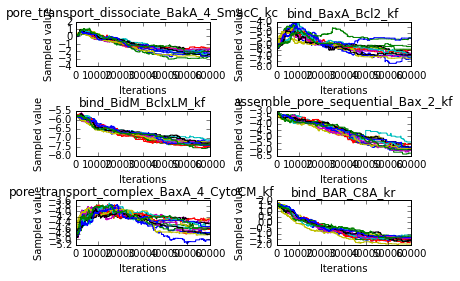

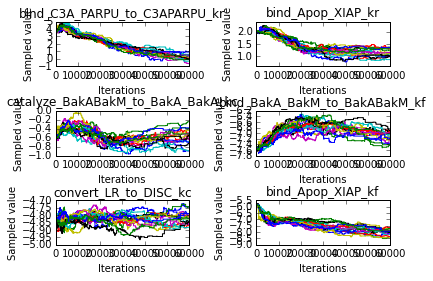

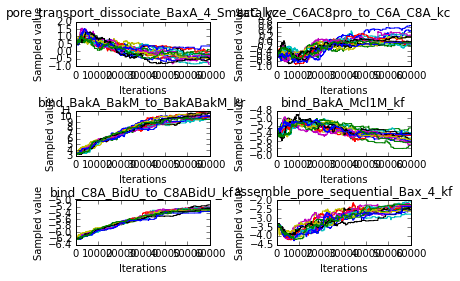

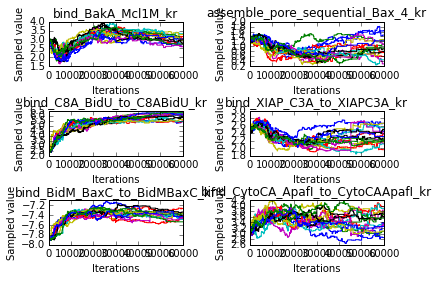

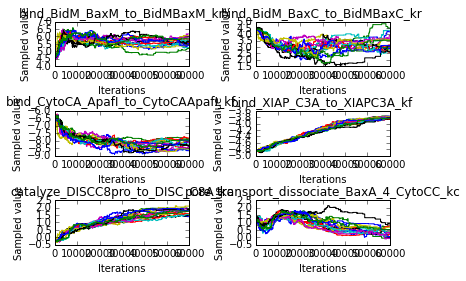

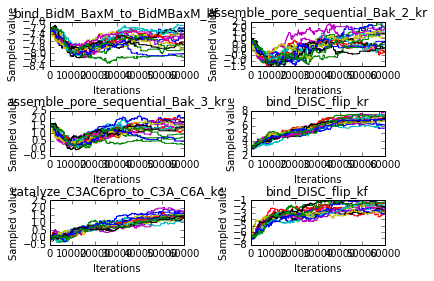

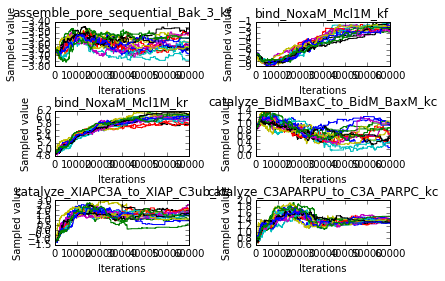

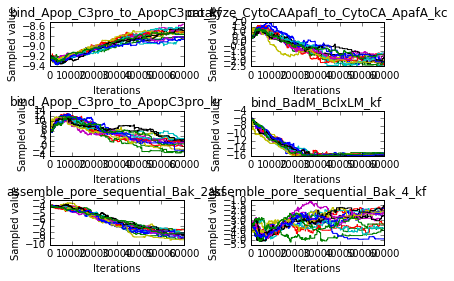

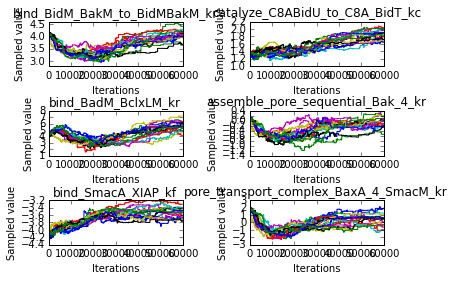

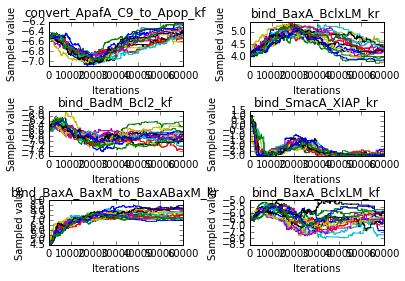

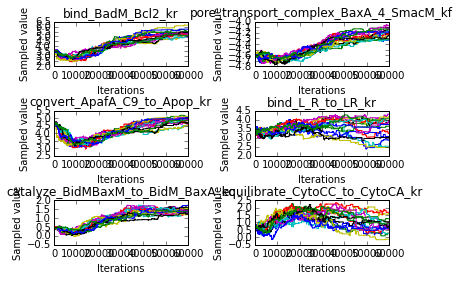

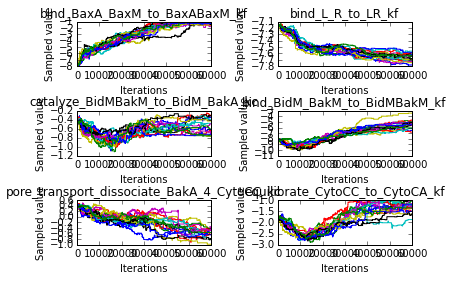

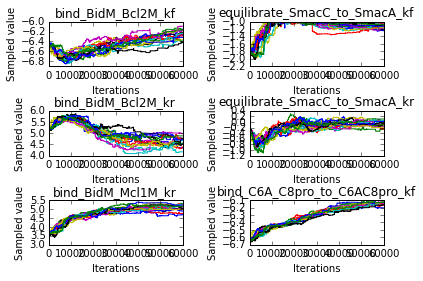

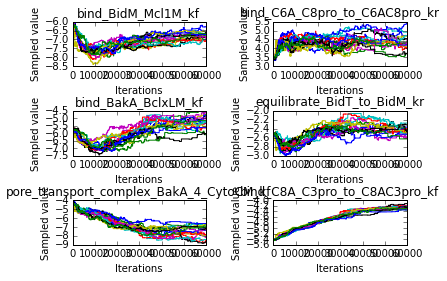

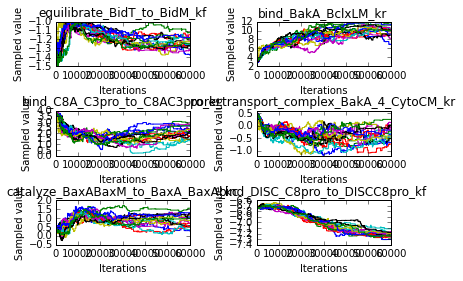

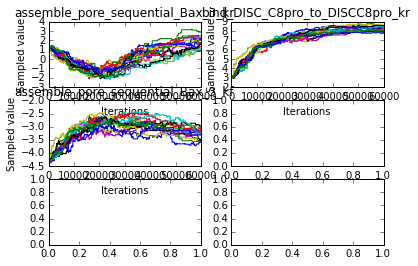

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [17]:
np.save('earm_dreamz_16chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_dreamz_16chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_dreamz_16chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_dreamz_16chain_psostart_d_tracearr.npy', trace_arr_d)

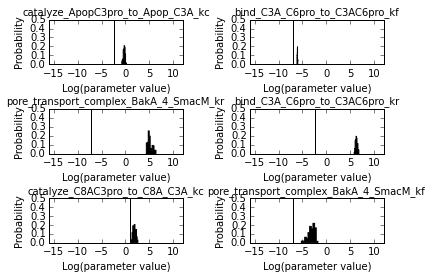

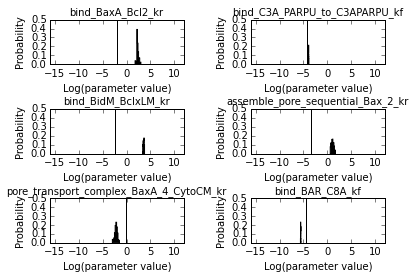

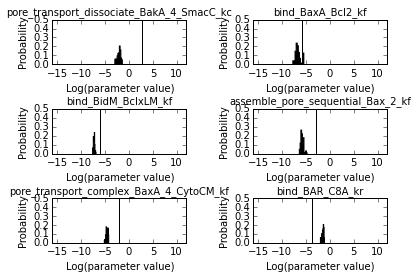

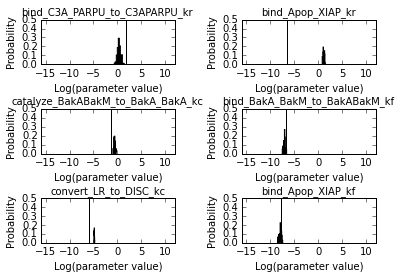

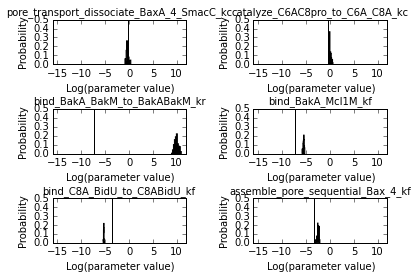

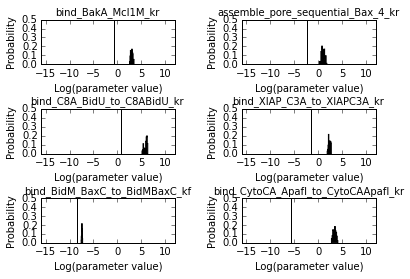

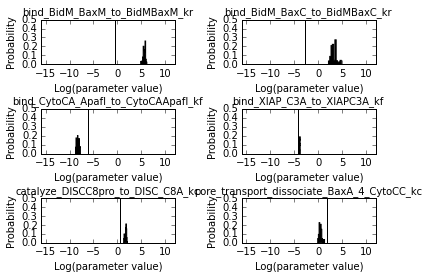

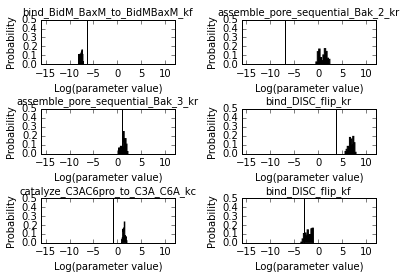

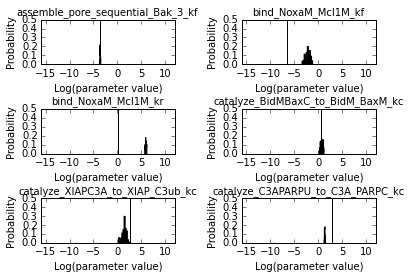

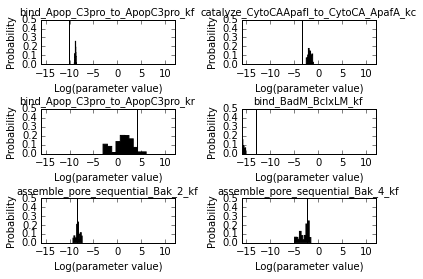

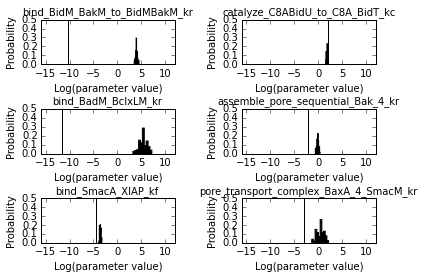

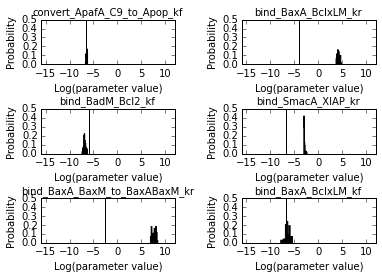

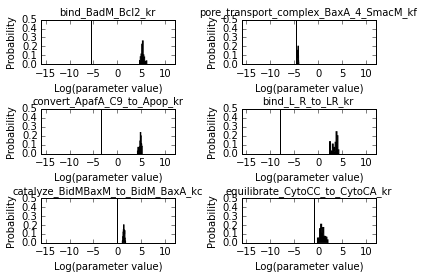

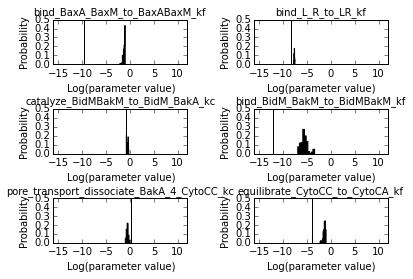

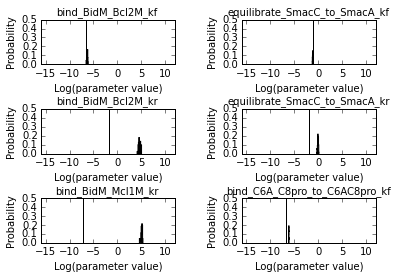

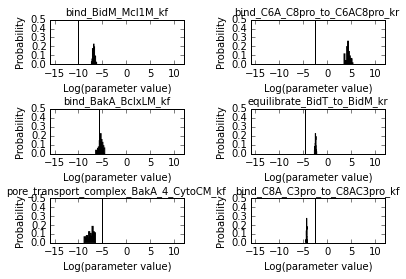

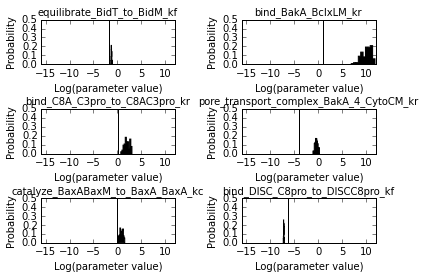

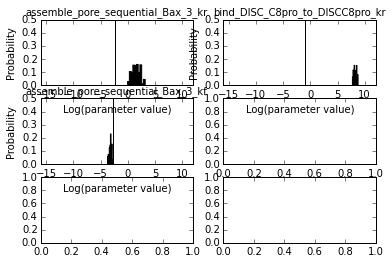

In [16]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)